Least Squares Method to find the degree and coefficients of the polynomial that fits the data best

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import polyfit

In [2]:

df = pd.read_csv('san_francisco_2015.csv')
df = df.drop(['Year Type', 'Year', 'Organization Group Code', 'Organization Group', 'Department Code', 'Department',
              'Union Code', 'Union', 'Job Family Code', 'Job Family', 'Job Code', 'Job', 'Employee Identifier'], axis=1)
df = df.loc[ (20000 < df['Salaries']) & (df['Salaries'] < 150000) ]
df

,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,82146.04,0.00,0.00,82146.04,16942.21,12340.88,6337.73,35620.82,117766.86
1,32165.75,973.19,848.96,33987.90,0.00,4587.51,2634.42,7221.93,41209.83
2,71311.00,5757.98,0.00,77068.98,14697.59,12424.50,6370.06,33492.15,110561.13
3,28430.25,0.00,763.07,29193.32,0.00,4223.14,5208.51,9431.65,38624.97
7,66988.54,3512.88,2770.39,73271.81,19127.22,13202.95,5455.10,37785.27,111057.08
...,...,...,...,...,...,...,...,...,...
42981,76728.01,0.00,824.00,77552.01,15942.80,12424.50,6368.85,34736.15,112288.16
42983,42793.30,0.00,0.00,42793.30,8506.93,6731.93,3317.55,18556.41,61349.71
42984,80691.52,11865.91,3290.29,95847.72,16909.07,12244.02,7788.00,36941.09,132788.81
42986,48843.58,2965.85,3316.21,55125.64,11047.55,6212.24,910.16,18169.95,73295.59


In [3]:

r = np.corrcoef((df['Salaries'],
                df['Overtime'],
                df['Other Salaries'],
                df['Total Salary'],
                df['Retirement'],
                df['Health/Dental'],
                df['Other Benefits'],
                df['Total Benefits'],
                df['Total Compensation'])
                )
r = np.round(r, 2)
r

array([[ 1.  ,  0.25,  0.33,  0.92,  0.91,  0.58,  0.48,  0.87,  0.94],
       [ 0.25,  1.  ,  0.37,  0.58,  0.32,  0.26, -0.05,  0.26,  0.52],
       [ 0.33,  0.37,  1.  ,  0.55,  0.36,  0.11, -0.07,  0.24,  0.5 ],
       [ 0.92,  0.58,  0.55,  1.  ,  0.88,  0.56,  0.35,  0.81,  0.99],
       [ 0.91,  0.32,  0.36,  0.88,  1.  ,  0.69,  0.42,  0.94,  0.92],
       [ 0.58,  0.26,  0.11,  0.56,  0.69,  1.  ,  0.31,  0.8 ,  0.63],
       [ 0.48, -0.05, -0.07,  0.35,  0.42,  0.31,  1.  ,  0.64,  0.43],
       [ 0.87,  0.26,  0.24,  0.81,  0.94,  0.8 ,  0.64,  1.  ,  0.88],
       [ 0.94,  0.52,  0.5 ,  0.99,  0.92,  0.63,  0.43,  0.88,  1.  ]])

In [4]:

data = df.sample(600, replace=False, random_state=42)

In [5]:

column_x = 'Total Benefits'
column_y = 'Total Compensation'

In [6]:

x = data[column_x].to_numpy()
y = data[column_y].to_numpy()

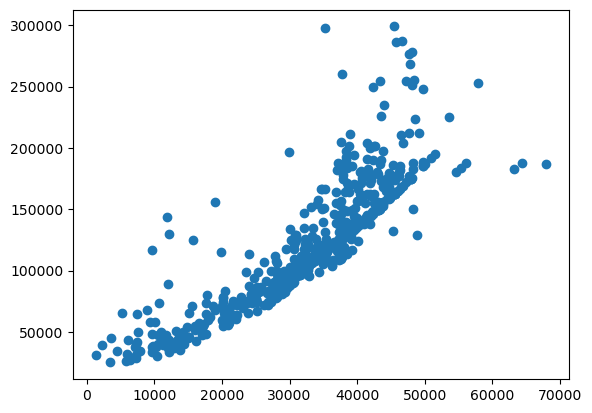

In [7]:

plt.scatter(x, y)

In [8]:

x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.15, random_state=42)
x_val

array([17846.62, 34465.59, 32047.23, 38659.69, 41991.91, 42947.42,
       38951.05, 31309.43, 23850.44, 29844.49, 44208.04,  7292.73,
       49801.22, 29037.35, 40069.93, 35249.65, 42438.86, 46556.74,
       34882.98, 25418.11, 43909.06, 17188.31, 39293.12, 19985.05,
       36955.82, 34476.18, 42198.49, 27723.34, 29474.83, 37916.69,
       41100.9 , 15058.44, 37559.98, 39700.73, 24389.38, 37139.56,
       57938.1 ,  9849.1 , 39088.54, 35241.81, 45245.01, 35629.11,
       29635.05, 48200.02, 31046.78, 46263.93, 37083.14,  7531.67,
       28928.16, 29876.26, 37609.72, 31493.72, 29860.95, 32466.7 ,
       47897.95, 43351.84, 30949.65, 28893.74, 26808.13, 34490.52,
       36476.4 , 30173.22, 22274.05, 46844.78, 33769.72, 42461.54,
       29647.85, 38052.73, 39140.19, 13446.99, 45262.42, 36351.31,
       37560.41, 39159.75, 36882.15, 41476.45, 23127.43])

In this assignment, you are going to use Least Squares Method to find the degree and coefficients of the polynomial that fits the data best.

In [9]:

degree = 6


Finding the coefficients of the degree-th (given above) order polynomial that fits (x_train, y_train) best (the one with lowest RMSE)

In [10]:

coefficients=polyfit(x_train,y_train,degree)
coefficients

array([ 1.49545277e-22, -2.76207435e-17,  1.82706453e-12, -5.29043065e-08,
        6.92588029e-04, -1.50804463e+00,  3.14667081e+04])


Finding the predictions of the polynomial found for x_val.

In [11]:

y_predictions=x_val.copy()
for i in range(len(x_val)):
    a=0
    for m,j in enumerate(coefficients):
        a+=j*(pow(y_predictions[i],degree-m))
    y_predictions[i]=a
y_predictions


array([ 64596.37016174, 121722.96649511, 108681.44850204, 146732.37229459,
       166573.05093057, 171886.05191768, 148508.66549862, 105010.41789536,
        77279.44566248,  98203.966304  , 178460.57966302,  41404.88625657,
       198450.80990461,  94739.96017726, 155289.5406481 , 126230.21938779,
       169089.00870198, 188954.13540283, 124108.11761779,  81727.14846072,
       176952.40982555,  63401.3595647 , 150590.36445956,  68592.26232325,
       136367.06626202, 121783.05774023, 167742.20987894,  89544.27459673,
        96591.84823985, 142200.3199214 , 161421.6770234 ,  59462.10733049,
       140028.84342562, 153062.23212496,  78735.8001413 , 137477.99962252,
       191690.34359802,  48022.05791696, 149345.98819313, 126184.59898725,
       183409.38731385, 128450.32171837,  97285.2772897 , 194580.06224423,
       103741.9904625 , 187792.05709261, 137136.58840331,  42030.56035965,
        94287.25392798,  98344.53013381, 140331.30932582, 105912.61067922,
        98276.75261765, 1


Finding the Root Mean Squared Error (RMSE) of the predictions 

In [12]:

RMSe=pow(mean_squared_error(y_val,y_predictions),1/2)
RMSe


23873.71233537657

In [13]:

max_degree = 12


Finding the best polynomial for each of degrees from 1 to max_degree (not included) and storing RMSE of each polynomial in an array named 'RMSEs'.

In [14]:

RMSEs=[]
for k in range(1,max_degree):
    degree=k
    coefficients=polyfit(x_train,y_train,degree)
    y_predictions=x_val.copy()
    for i in range(len(x_val)):
        a=0
        for m,j in enumerate(coefficients):
            a+=j*(pow(y_predictions[i],degree-m))
        y_predictions[i]=a
    RMSe=pow(mean_squared_error(y_val,y_predictions),1/2)
    RMSEs.append(RMSe)
RMSEs

[26254.839412109406,
 24772.37708796177,
 24090.542670392002,
 23473.100658045212,
 23671.414880911223,
 23873.71233537657,
 23869.679912909964,
 23874.256926833004,
 23888.643840254594,
 24235.42609311812,
 26467.73314251095]

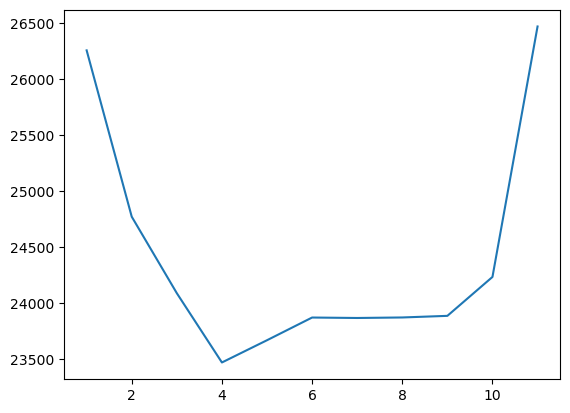

In [15]:

plt.plot(np.arange(1,max_degree), RMSEs)


Determining the degree of best polynomial from 'RMSEs'.

In [16]:
# Write your answer here
best_degree=RMSEs.index(min(RMSEs))+1
best_degree
        


4


Finding the coefficients of the best_degree-th order polynpmial that fits (x_train_full, y_train_full) using the method 'polyfit'.  
Finding the predictions of the polynomial found for x_test.  
Finding the Root Mean Squared Error (RMSE) of the predictions found (true values=y_test)

In [17]:
# Write your answer here
coefficients_full=polyfit(x_train_full,y_train_full,best_degree)
full_y_predictions=x_test.copy()
for i in range(len(x_test)):
    a=0
    for m,j in enumerate(coefficients_full):
        a+=j*(pow(full_y_predictions[i],best_degree-m))
    full_y_predictions[i]=a
RMSe=pow(mean_squared_error(y_test,full_y_predictions),1/2)
RMSe

21532.645612073935